**Reference**: https://github.com/qiskit-community/ibm-quantum-challenge-2024/blob/main/content/lab_3/lab-3-circuit-knitting.ipynb

In [1]:
### Install Qiskit and relevant packages, if needed

%pip install -q qiskit[visualization]==1.0.2
%pip install -q qiskit-ibm-runtime
%pip install -q qiskit-aer
%pip install -q qiskit-transpiler-service
%pip install -q graphviz
%pip install -q circuit-knitting-toolbox
%pip install -q qiskit-serverless -U
%pip install -q git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 31.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 6.1 MB/s eta 0:00:00
  Installing bui

In [2]:
%set_env QXToken=16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b

env: QXToken=16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b


In [3]:
# qc-grader should be 0.18.11 (or higher)
import qc_grader

qc_grader.__version__

'0.18.11'

In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_gate_map
from qiskit.quantum_info import SparsePauliOp

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from circuit_knitting.cutting import generate_cutting_experiments, cut_gates

In [5]:
# Setup the grader

from qc_grader.challenges.iqc_2024 import grade_lab3_ckt_ex1, grade_lab3_ckt_ex2

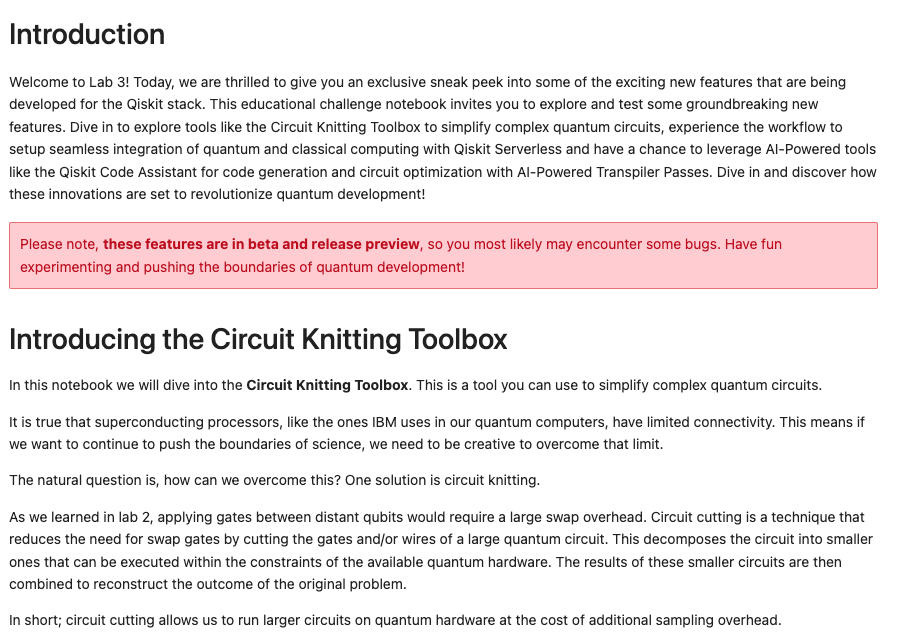

 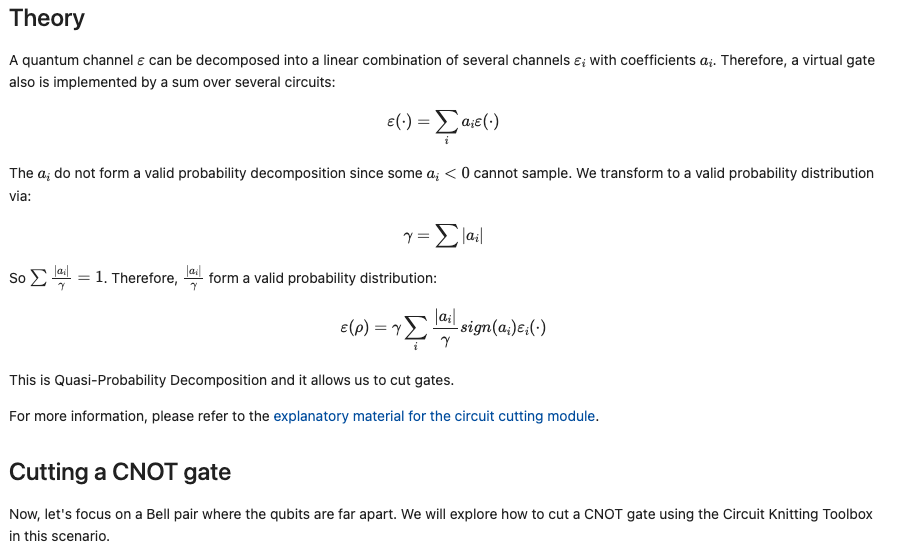

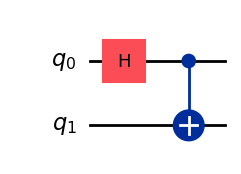

In [6]:
# create a bell pair
bell_state = QuantumCircuit(2)
bell_state.h(0)
bell_state.cx(0,1)
bell_state.draw("mpl")

In [7]:
## If this is your first time accessing the backend
## remove # and fill your API key, and run the code

QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b",
    set_as_default=True,
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()


# service = QiskitRuntimeService(
#    channel='ibm_quantum',
#   #  instance='ibm-q/open/main',
#    token='16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b'
# )

# service = QiskitRuntimeService(channel="ibm_quantum")

# Specify a system to use for transpilation, DO NOT change
backend = service.backend("ibm_kyoto")

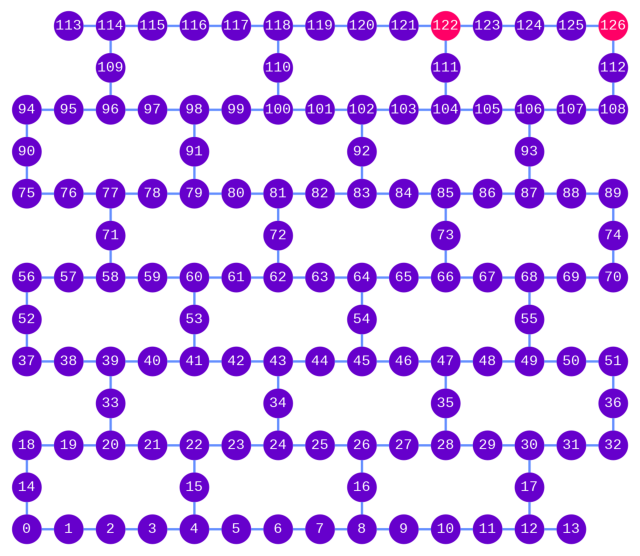

In [8]:
# Now, we choose a layout that requires many swaps to execute the gates between qubits 122 and 126,
# as well as many swaps to return the qubits to their initial positions.

layout=[122, 126]
qubit_color = []
for i in range(127):
    if i in layout:
        qubit_color.append("#ff0066")
    else:
        qubit_color.append("#6600cc")
plot_gate_map(backend, qubit_color=qubit_color, qubit_size=60, font_size=25, figsize=(8,8))

Transpiled circuit depth:  27


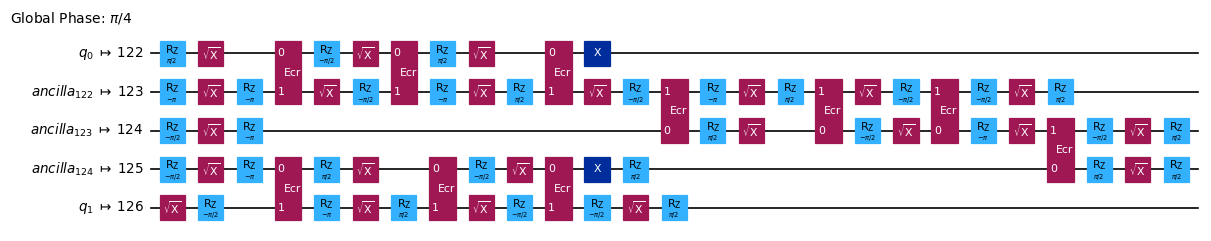

In [9]:
# We will transpile the Bell pair circuit to get the Instruction Set Architecture (ISA) circuit, which the device can understand and execute.

# transpile the circuit
pm = generate_preset_pass_manager(backend=backend, optimization_level=1, initial_layout=layout, seed_transpiler=0)
isa_qc = pm.run(bell_state)

# original circuit depth
isa_qc_depth = isa_qc.depth()
print(f"Transpiled circuit depth: ", isa_qc_depth)
isa_qc.draw("mpl", scale=0.6, idle_wires=False, fold=False)

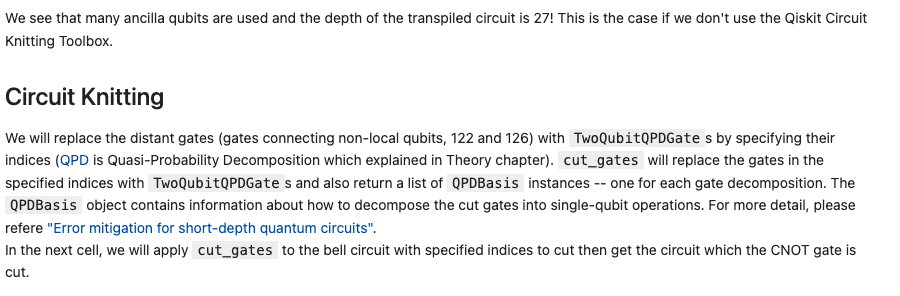

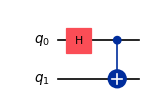

In [33]:
bell_state.draw("mpl", scale=0.6)

[1]


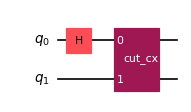

In [10]:
# Find the indices of the distant gates
cut_indices = [
    i
    for i, instruction in enumerate(bell_state.data)
    if {bell_state.find_bit(q)[0] for q in instruction.qubits} == {0, 1}
]
print(cut_indices)
# Decompose distant CNOTs into TwoQubitQPDGate instances
qpd_circuit, bases = cut_gates(bell_state, cut_indices)

qpd_circuit.draw("mpl", scale=0.6)

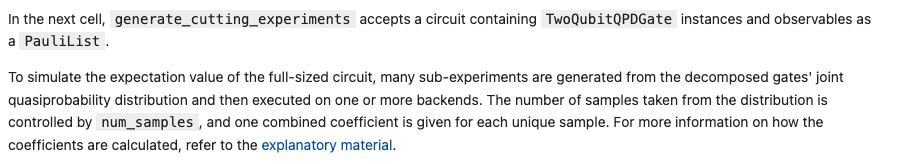

In [11]:
observable = SparsePauliOp(["ZI"])

# Generate the sub-experiments and sampling coefficients
sub_experiments, coefficients = generate_cutting_experiments(
    circuits=qpd_circuit, observables=observable.paulis, num_samples=np.inf
)

Here is an example of an arbitrarily chosen sub-experiment generated from the QPD circuit. Its depth has been reduced significantly from 27 to 7. Many of these probabilistic sub-experiments must be generated and evaluated in order to reconstruct an expectation value of the deeper circuit. For this circuit, we need six sub-experiments to reconstruct it.

Original circuit depth after transpile:  27
QPD sub-experiment depth after transpile:  7
Number of sub-experiments: 6


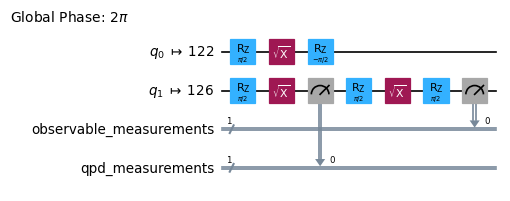

In [12]:
# Transpile the circuit
pm = generate_preset_pass_manager(backend=backend, optimization_level=1, initial_layout=layout, seed_transpiler=0)
isa_qpd_circuit = pm.run(sub_experiments[5])

# depth using circuit cutting
isa_qpd_depth = isa_qpd_circuit.depth()

print(f"Original circuit depth after transpile: ", isa_qc_depth)
print(f"QPD sub-experiment depth after transpile: ", isa_qpd_depth)
print(f"Number of sub-experiments:", len(sub_experiments))
isa_qpd_circuit.draw("mpl", scale=0.6, idle_wires=False, fold=False)

In [13]:
# The above circuit is the fifth circuit in six sub-experiments. Let's see the depth of all sub-experiments.

x = np.array([c.depth() for c in pm.run(sub_experiments)])
print(x)

[4 3 3 3 7 7]


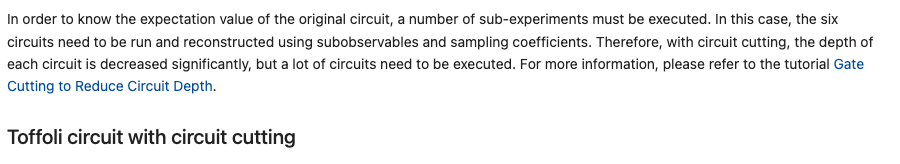

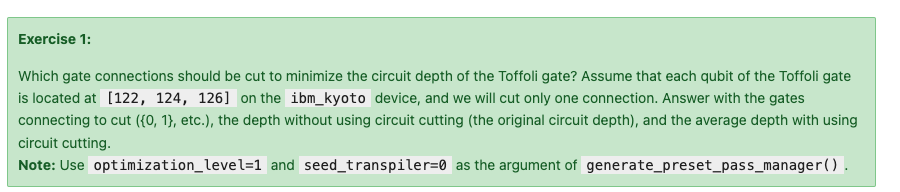

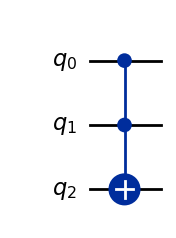

In [154]:
toffoli_layout = [122, 124, 126]

toffoli = QuantumCircuit(3)
toffoli.ccx(0, 1, 2)
toffoli.draw("mpl")

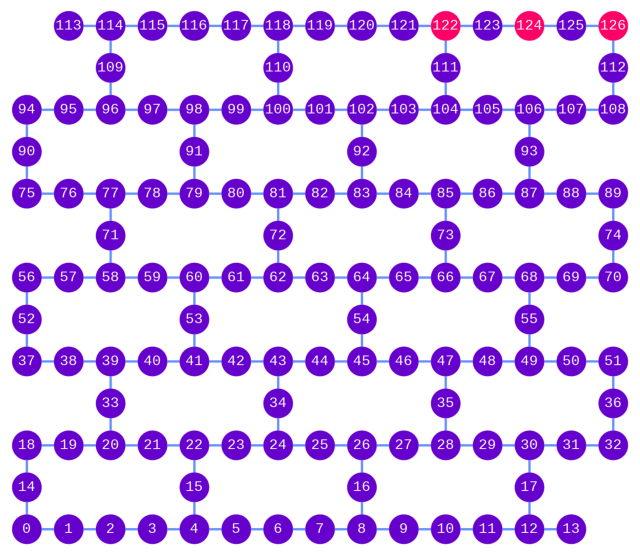

In [155]:
layout=[122, 124, 126]
qubit_color = []
for i in range(127):
    if i in layout:
        qubit_color.append("#ff0066")
    else:
        qubit_color.append("#6600cc")
plot_gate_map(backend, qubit_color=qubit_color, qubit_size=60, font_size=25, figsize=(8,8))

In [160]:
# Transpile the circuit
pm = generate_preset_pass_manager(backend=backend, optimization_level=1, initial_layout=toffoli_layout, seed_transpiler=0)
isa_toffoli = pm.run(toffoli)

In [157]:
# Calculate original circuit depth
isa_toffoli_depth = isa_toffoli.depth()
isa_toffoli_depth

62

Transpiled circuit depth: 62


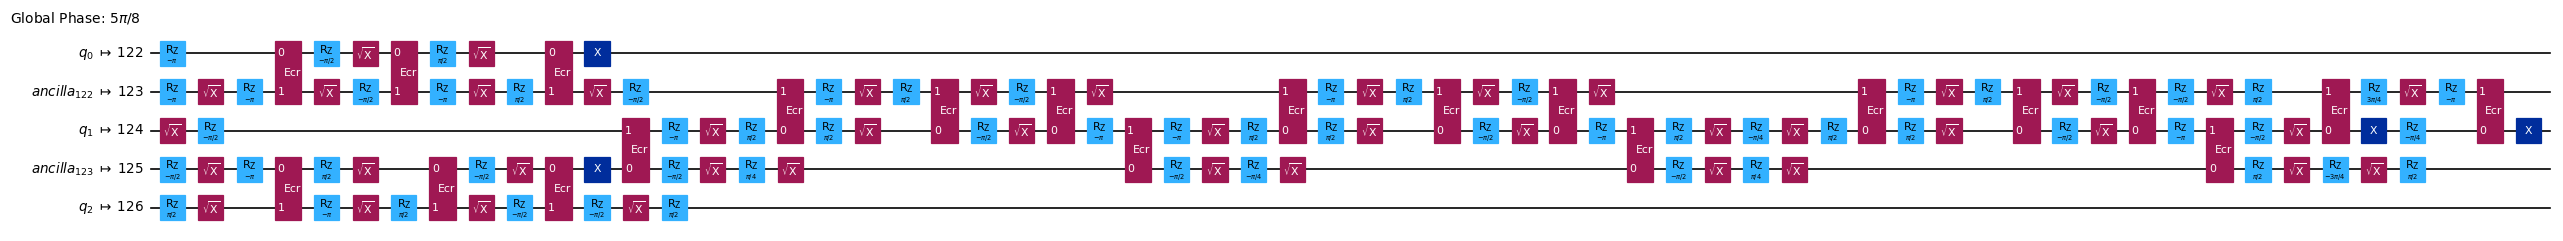

In [158]:
# Print the depth and draw the circuit
print(f"Transpiled circuit depth: {isa_toffoli_depth}")
isa_toffoli.draw("mpl", scale=0.6, idle_wires=False, fold=False)

[3, 8]


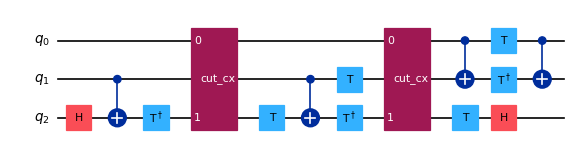

In [162]:
# To know the depth using circuit cutting

# Decompose the toffoli circuit
toffoli_ = toffoli.decompose()

### Write your code below here ###
# Find the indices of the distant gates
gates_connecting_to_cut = {0,2}
 #{(0, 2), (0, 1), (1, 2)}
#  [{0, 2}, {0, 1}, {1, 2}]

cut_indices = [
    i
    for i, instruction in enumerate(toffoli_.data)
    if {toffoli_.find_bit(q)[0] for q in instruction.qubits} == gates_connecting_to_cut
 ]


print(cut_indices)
# Decompose distant CNOTs into TwoQubitQPDGate instances
qpd_circuit, bases = cut_gates(toffoli_, cut_indices)

### Don't change any code past this line ###
toffoli_.draw("mpl")
qpd_circuit.draw("mpl", scale=0.6)



Transpiled circuit depth: 62
QPD sub-experiment depth after transpile: 35
Number of sub-experiments: 36


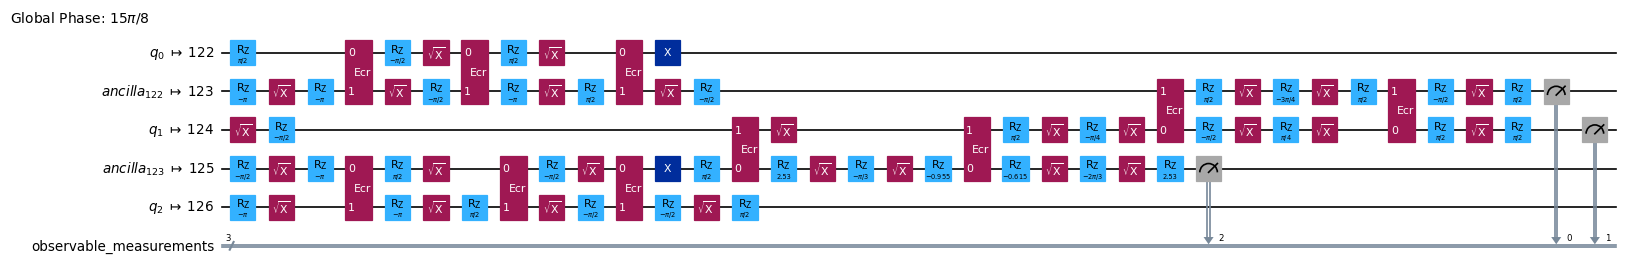

In [163]:
# Set the observables
observable = SparsePauliOp(["ZZZ"])

### Write your code below here ###
# Generate the sub-experiments and sampling coefficients
sub_experiments, coefficients = generate_cutting_experiments(
    circuits=qpd_circuit, observables=observable.paulis, num_samples=np.inf
)

# Transpile the circuit
# Note: Use optimization_level=1 and seed_transpiler=0
pm = generate_preset_pass_manager(backend=backend, optimization_level=1, initial_layout=toffoli_layout, seed_transpiler=0)
isa_qpd_circuit = pm.run(sub_experiments[0])  # Using the first sub-experiment for example

# Depth using circuit cutting
isa_qpd_toffoli_depth = isa_qpd_circuit.depth()

### Don't change any code past this line ###
print(f"Transpiled circuit depth: {isa_toffoli_depth}")
print(f"QPD sub-experiment depth after transpile: {isa_qpd_toffoli_depth}")
print(f"Number of sub-experiments: {len(sub_experiments)}")
isa_qpd_circuit.draw("mpl", scale=0.6, idle_wires=False, fold=False)


In [164]:
### Write your code below here ###
# Mean of the depth of all sub-experiments
depth_list = [pm.run(sub_experiment).depth() for sub_experiment in sub_experiments]
isa_qpd_toffoli_depth_mean = np.mean(depth_list)

### Don't change any code past this line ###
print(isa_qpd_toffoli_depth_mean)


35.333333333333336


In [165]:
# Submit your answer using following code

grade_lab3_ckt_ex1(gates_connecting_to_cut, isa_toffoli_depth, depth_list)
# Expected result type: set, int, numpy.ndarray

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


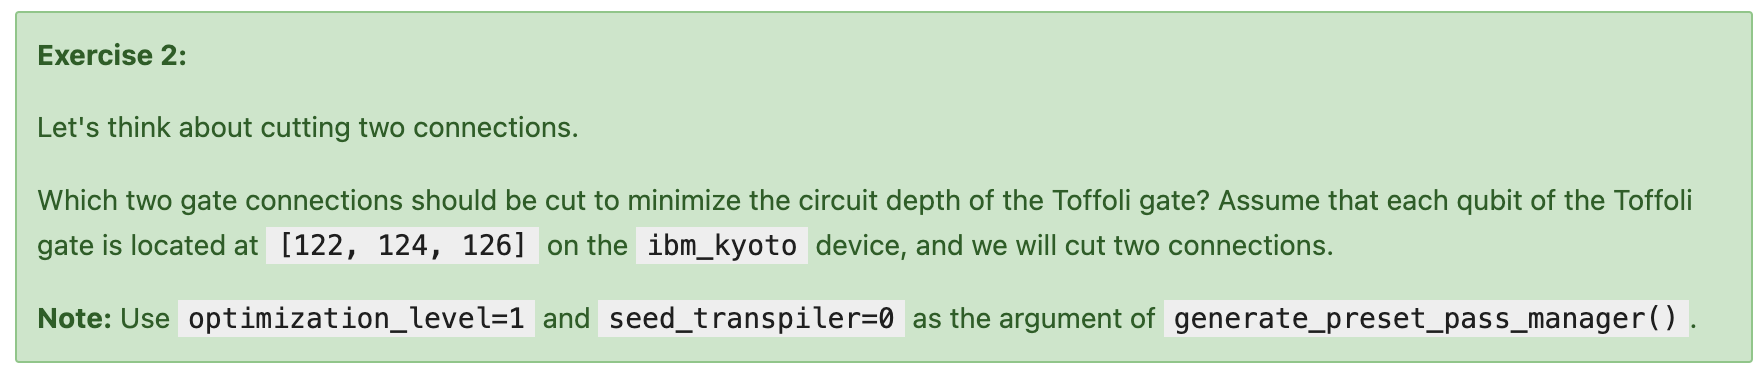


Note: It may take more than one minute to run under one condition. So it takes a long time to compare results to find a solution. Because cutting the connection in two places would be expected to reduce the circuit depth, but increase the number of sub-experiments.

[3, 8] [1, 5]
[8, 5]


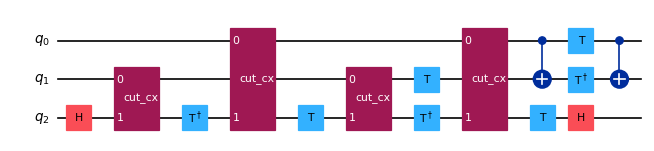

In [169]:
### Write your code below here ###
# Define the sets of gate connections to cut
gates_connecting_to_cut_1 = {0, 2}  # First possible cut
gates_connecting_to_cut_2 = {1, 2}  # Second possible cut

# Find the indices of the distant gates for the first cut
cut_indices_1 = [
    i
    for i, instruction in enumerate(toffoli_.data)
    if {toffoli_.find_bit(q)[0] for q in instruction.qubits} == gates_connecting_to_cut_1
]

# Find the indices of the distant gates for the second cut
cut_indices_2 = [
    i
    for i, instruction in enumerate(toffoli_.data)
    if {toffoli_.find_bit(q)[0] for q in instruction.qubits} == gates_connecting_to_cut_2
]

# Choose the set of cut indices that minimizes the circuit depth
# if len(cut_indices_1) <= len(cut_indices_2):
#     cut_indices = cut_indices_1
#     gates_connecting_to_cut = gates_connecting_to_cut_1
# else:
#     cut_indices = cut_indices_2
#     gates_connecting_to_cut = gates_connecting_to_cut_2
print(cut_indices_1,cut_indices_2)
print([cut_indices_1[1],cut_indices_2[1]])
# Decompose distant CNOTs into TwoQubitQPDGate instances
qpd_circuit_2, bases = cut_gates(toffoli_, cut_indices_1+cut_indices_2)

### Don't change any code past this line ###
qpd_circuit_2.draw("mpl", scale=0.6)


# Decompose distant CNOTs into TwoQubitQPDGate instances


### Don't change any code past this line ###
qpd_circuit_2.draw("mpl", scale=0.6)

total subexperiemnt 1296
QPD sub-experiment depth after transpile:  21
Number of sub-experiments: 1296


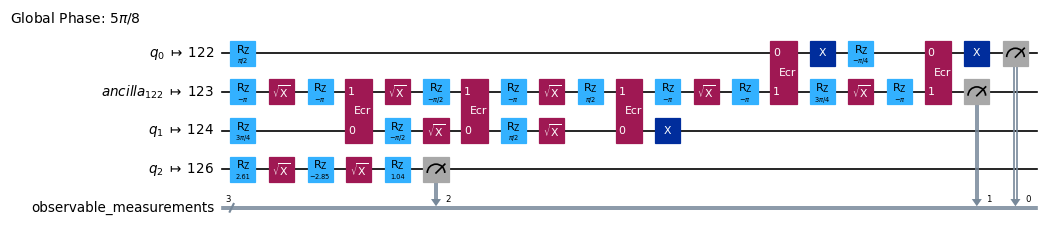

In [170]:
# set the observables
observable = SparsePauliOp(["ZZZ"])

### Write your code below here ###
# Generate the sub-experiments and sampling coefficients

# sub_experiments_2, coefficients =

# Transpile the circuit
# Note: Use optimization_level=1 and seed_transpiler=0

sub_experiments_2, coefficients = generate_cutting_experiments(
    circuits=qpd_circuit_2, observables=observable.paulis, num_samples=np.inf
)

# Transpile the circuit
# Note: Use optimization_level=1 and seed_transpiler=0
pm = generate_preset_pass_manager(backend=backend, optimization_level=1, initial_layout=toffoli_layout, seed_transpiler=0)
print("total subexperiemnt",len(sub_experiments_2))
isa_qpd_circuit_2 = pm.run(sub_experiments_2[0])  # Using the first sub-experiment for example


# Depth using circuit cutting
isa_qpd_toffoli_depth_2 =isa_qpd_circuit_2.depth()


### Don't change any code past this line ###
print(f"QPD sub-experiment depth after transpile: ", isa_qpd_toffoli_depth_2)
print(f"Number of sub-experiments:", len(sub_experiments_2))
isa_qpd_circuit_2.draw("mpl", scale=0.6, idle_wires=False, fold=False)


In [171]:
### Write your code below here ###
# mean of the depth of all sub-experiments
depth_list_2 = [pm.run(sub_experiment_2).depth() for sub_experiment_2 in sub_experiments_2]
isa_qpd_toffoli_depth_2_mean =np.mean(depth_list_2)

### Don't change any code past this line ###
print(isa_qpd_toffoli_depth_2_mean)
print(depth_list_2)

21.246913580246915
[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 

In [172]:
# Submit your answer using following code

grade_lab3_ckt_ex2(gates_connecting_to_cut_1, gates_connecting_to_cut_2, sub_experiments_2)
# Expected result type: set, set, list[QuantumCircuit]

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


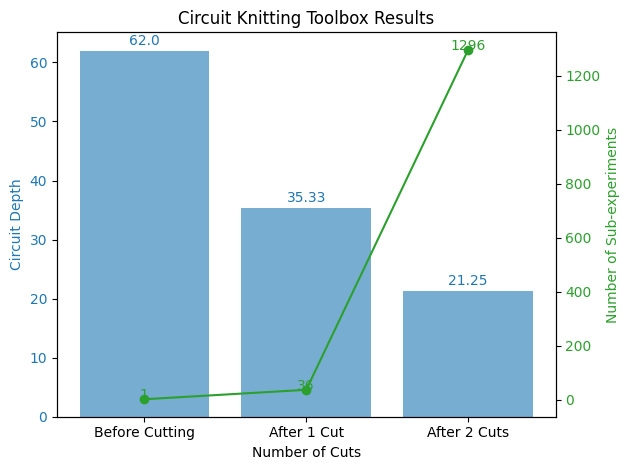

In [173]:
# Number of sub-experiments
num_sub_experiments_1_cut = len(sub_experiments)
num_sub_experiments_2_cut = len(sub_experiments_2)

# Data for plotting
categories = ['Before Cutting', 'After 1 Cut', 'After 2 Cuts']
depth_values = [isa_toffoli_depth, isa_qpd_toffoli_depth_mean, isa_qpd_toffoli_depth_2_mean]
num_sub_experiments = [1, num_sub_experiments_1_cut, num_sub_experiments_2_cut]

# Create figure and axis
fig, ax1 = plt.subplots()

# Plot depth values
color = 'tab:blue'
ax1.set_xlabel('Number of Cuts')
ax1.set_ylabel('Circuit Depth', color=color)
bars = ax1.bar(categories, depth_values, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', color=color, fontsize=10)

# Create a second y-axis to plot the number of subexperiments
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Number of Sub-experiments', color=color)
ax2.plot(categories, num_sub_experiments, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Add value labels on points
for i, num in enumerate(num_sub_experiments):
    ax2.text(i, num + 0.1, num, ha='center', color=color, fontsize=10)

# Add titles and labels
plt.title('Circuit Knitting Toolbox Results')
fig.tight_layout()  # Adjust layout to make room for both y-axes

# Show plot
plt.show()